# Analyzing Content Across Netflix, Prime, Disney+ & Hulu

## A comparative data visualization project analyzing content volume, diversity, audience targeting, and overlap across top streaming platforms.

For this project, I have selected four datasets from Kaggle, each presenting a catalog of major streaming platforms: Netflix, Amazon Prime, Disney+ and Hulu.

https://www.kaggle.com/datasets/shivamb/netflix-shows

https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows/code

## Imports

In [1]:
import numpy as np
import pandas as pd

from itertools import combinations
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Loading

In [2]:
df_netflix = pd.read_csv(r"netflix_titles.csv")
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df_amazon_prime = pd.read_csv(r"amazon_prime_titles.csv")
df_amazon_prime

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [4]:
df_disney_plus = pd.read_csv(r"disney_plus_titles.csv")
df_disney_plus

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [5]:
df_hulu = pd.read_csv(r"hulu_titles.csv")
df_hulu

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


## EDA

In [6]:
df_netflix.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 8.9 MB


In [7]:
df_amazon_prime.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.4 MB


In [8]:
df_disney_plus.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.2 MB


In [9]:
df_hulu.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.1 MB


In [10]:
def preprocess_platform_df(df, platform_name):
    df['platform'] = platform_name

    df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

    df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\D*)')
    df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

    df.columns = df.columns.str.lower()

    return df

In [11]:
df_netflix = preprocess_platform_df(df_netflix, 'Netflix')
df_amazon_prime = preprocess_platform_df(df_amazon_prime, 'Amazon Prime')
df_disney_plus = preprocess_platform_df(df_disney_plus, 'Disney+')
df_hulu = preprocess_platform_df(df_hulu, 'Hulu')

df_all = pd.concat([df_netflix, df_amazon_prime, df_disney_plus, df_hulu], ignore_index=True)

In [12]:
df_all

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaT,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu,3.0,Seasons
22994,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaT,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu,7.0,Seasons
22995,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaT,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu,1.0,Season
22996,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaT,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu,5.0,Seasons


In [13]:
df_all.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        22998 non-null  object        
 1   type           22998 non-null  object        
 2   title          22998 non-null  object        
 3   director       14738 non-null  object        
 4   cast           17677 non-null  object        
 5   country        11499 non-null  object        
 6   date_added     13444 non-null  datetime64[ns]
 7   release_year   22998 non-null  int64         
 8   rating         22134 non-null  object        
 9   duration       22516 non-null  object        
 10  listed_in      22998 non-null  object        
 11  description    22994 non-null  object        
 12  platform       22998 non-null  object        
 13  duration_int   22516 non-null  float64       
 14  duration_type  22516 non-null  object        
dtypes: datetime64[ns](1

In [14]:
missing = df_all.isnull().sum()
missing_percent = np.round((missing / len(df_all)) * 100, 2)

missing_df = (pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
    .reset_index()
    .rename(columns={'index': 'Column'})
    .sort_values('Missing Count', ascending=True))

missing_df

,Column,Missing Count,Missing %
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00
12,platform,0,0.00
10,listed_in,0,0.00
11,description,4,0.02
9,duration,482,2.10
14,duration_type,482,2.10
13,duration_int,482,2.10


In [15]:
df_all['country'].fillna('Unknown', inplace=True)
df_all['director'].fillna('Unknown', inplace=True)
df_all['cast'].fillna('Unknown', inplace=True)
df_all['rating'].fillna('Unrated', inplace=True)
df_all['date_added'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df_all['description'].fillna('Unknown', inplace=True)

df_all.dropna(subset=['duration_int', 'duration_type'], inplace=True)

df_all.reset_index(drop=True, inplace=True)

<ipython-input-15-fc8015ba2f84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all['country'].fillna('Unknown', inplace=True)
<ipython-input-15-fc8015ba2f84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22516 entries, 0 to 22515
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        22516 non-null  object        
 1   type           22516 non-null  object        
 2   title          22516 non-null  object        
 3   director       22516 non-null  object        
 4   cast           22516 non-null  object        
 5   country        22516 non-null  object        
 6   date_added     22516 non-null  datetime64[ns]
 7   release_year   22516 non-null  int64         
 8   rating         22516 non-null  object        
 9   duration       22516 non-null  object        
 10  listed_in      22516 non-null  object        
 11  description    22516 non-null  object        
 12  platform       22516 non-null  object        
 13  duration_int   22516 non-null  float64       
 14  duration_type  22516 non-null  object        
dtypes: datetime64[ns](1

In [17]:
missing = df_all.isnull().sum()
missing_percent = np.round((missing / len(df_all)) * 100, 2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing Count', ascending=False)

missing_df

,Missing Count,Missing %
show_id,0,0.0
type,0,0.0
title,0,0.0
director,0,0.0
cast,0,0.0
country,0,0.0
date_added,0,0.0
release_year,0,0.0
rating,0,0.0
duration,0,0.0


<ipython-input-18-a1b9c4aa2931>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


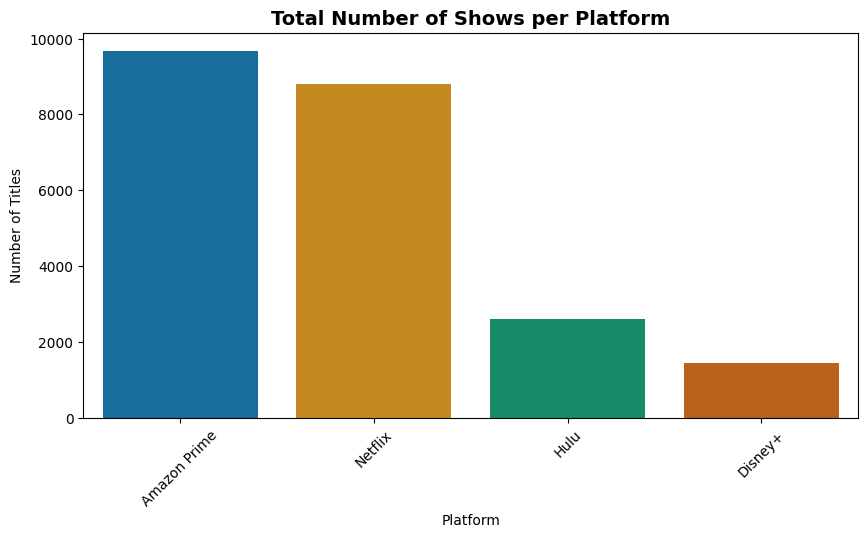

In [18]:
plt.figure(figsize=(10, 5))

platform_order = df_all['platform'].value_counts().index

ax = sns.countplot(
    data=df_all,
    x='platform',
    order=platform_order,
    palette='colorblind')

plt.xticks(rotation=45)

plt.title("Total Number of Shows per Platform", fontsize=14, weight='bold')
plt.xlabel("Platform")
plt.ylabel("Number of Titles")

plt.show()

 ## Hypothesis 1: Amazon Prime has the largest and most diverse content library

In [19]:
df_genres = df_all.copy()

df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')

<ipython-input-20-440e844f9240>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_diversity, x='platform', y='Unique Genres', palette='colorblind')


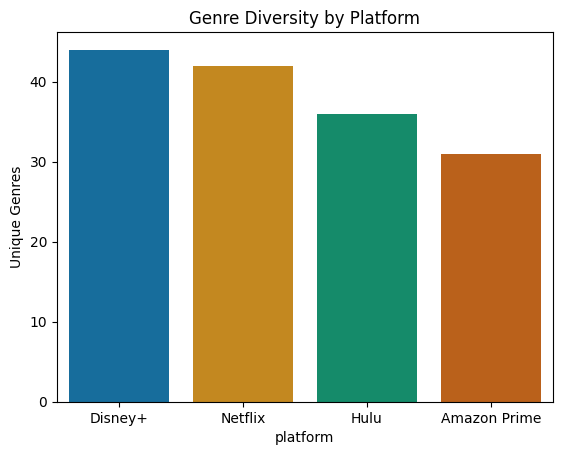

In [20]:
genre_diversity = (df_genres.groupby('platform')['listed_in']
    .nunique()
    .reset_index(name='Unique Genres')
    .sort_values('Unique Genres', ascending=False))

sns.barplot(data=genre_diversity, x='platform', y='Unique Genres', palette='colorblind')
plt.title('Genre Diversity by Platform')

plt.show()

The chart reveals the # of unique genres (based on the listed_in feature) represented on each streaming platform:

Disney+ surprisingly leads in genre diversity, with around 40+ unique genres. Although Disney+ is perceived as family-oriented platform, it has a wide range of genre labels — likely due to its acquired content.

Netflix is the second. This aligns with its reputation for offering globally diverse catalog.

Hulu is in the middle, which is expected given its more limited international presence and licensing scope.

Amazon Prime has the lowest genre diversity among the platforms. This might be driven by a content strategy less focused on genre availability.

In [21]:
df_genres = df_all.copy()

df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')

platforms = df_genres['platform'].dropna().unique()
treemap_data = []

for platform in platforms:
    df_platform = df_genres[df_genres['platform'] == platform]

    genre_counts = (
        df_platform['listed_in']
        .value_counts()
        .rename_axis('listed_in')
        .reset_index(name='count'))

    top_genres = genre_counts['listed_in'].head(5).tolist()
    genre_counts['listed_in'] = genre_counts['listed_in'].apply(lambda g: g if g in top_genres else 'Other')

    genre_counts = genre_counts.groupby('listed_in', as_index=False)['count'].sum()
    genre_counts['platform'] = platform

    treemap_data.append(genre_counts)

df_treemap_split = pd.concat(treemap_data, ignore_index=True)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=platforms,
    specs=[[{"type": "treemap"}, {"type": "treemap"}],
           [{"type": "treemap"}, {"type": "treemap"}]])

row_col_map = [(1, 1), (1, 2), (2, 1), (2, 2)]

for (platform, (row, col)) in zip(platforms, row_col_map):
    df_sub = df_treemap_split[df_treemap_split['platform'] == platform]

    fig.add_trace(
        go.Treemap(
            labels=df_sub['listed_in'],
            parents=[""] * len(df_sub),
            values=df_sub['count'],
            textinfo="label+percent entry",
            name=platform
        ),
        row=row,
        col=col)

fig.update_layout(
    title_text="Genre Treemap by Platform",
    height=850,
    margin=dict(t=80, l=20, r=20, b=20))

fig.show()

## Hypothesis 2: Netflix and Amazon Prime share the most overlapping titles

In [22]:
df_titles = df_all[['title', 'platform']].dropna().drop_duplicates()
multi_platform = df_titles.groupby('title')['platform'].nunique()
shared_titles = multi_platform[multi_platform > 1].index

In [23]:
pairs = []
for title in shared_titles:
    platforms = df_titles[df_titles['title'] == title]['platform'].tolist()
    for a, b in combinations(sorted(platforms), 2):
        pairs.append((a, b))

In [24]:
pair_counts = Counter(pairs)

df_pairs = pd.DataFrame(pair_counts.items(), columns=['platform_pair', 'count'])
df_pairs[['platform1', 'platform2']] = pd.DataFrame(df_pairs['platform_pair'].tolist(), index=df_pairs.index)

In [25]:
ordered_labels = ['Amazon Prime', 'Hulu', 'Disney+', 'Netflix']
label_to_index = {label: idx for idx, label in enumerate(ordered_labels)}

In [26]:
df_pairs['source_idx'] = df_pairs['platform1'].map(label_to_index)
df_pairs['target_idx'] = df_pairs['platform2'].map(label_to_index)

In [27]:
platform_colors = {
    'Netflix': '#E50914',
    'Amazon Prime': '#00A8E1',
    'Hulu': '#3DBB3D',
    'Disney+': '#113CCF'}

node_colors = [platform_colors.get(label, '#999999') for label in ordered_labels]

In [28]:
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=30,
        thickness=30,
        line=dict(color="black", width=1),
        label=ordered_labels,
        color=node_colors
    ),
    link=dict(
        source=df_pairs['source_idx'],
        target=df_pairs['target_idx'],
        value=df_pairs['count'],
        color='rgba(160,160,160,0.35)',
        hovertemplate='%{source.label} → %{target.label}<br>Shared Titles: %{value}<extra></extra>'
    ))])

fig.update_layout(
    title_text="Shared Titles Between Streaming Platforms",
    font=dict(size=14),
    height=600,
    margin=dict(l=40, r=40, t=80, b=40))

fig.show()

<ipython-input-29-72541beba7c4>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




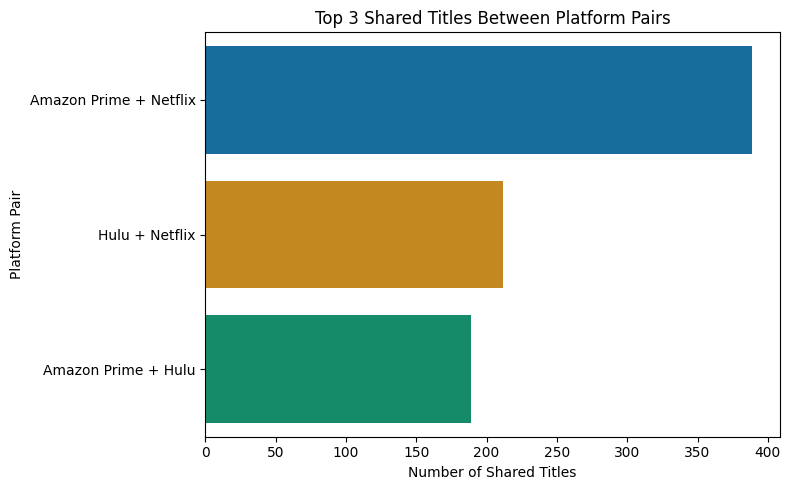

In [29]:
df_pairs['Platform Pair'] = df_pairs['platform_pair'].apply(lambda x: ' + '.join(x))

top3 = df_pairs.sort_values('count', ascending=False).head(3)

plt.figure(figsize=(8, 5))
sns.barplot(data=top3, x='count', y='Platform Pair', palette='colorblind')

plt.title("Top 3 Shared Titles Between Platform Pairs")
plt.xlabel("Number of Shared Titles")
plt.ylabel("Platform Pair")
plt.tight_layout()
plt.show()

## Hypothesis 4: TV Shows tend to be added more recently than Movies

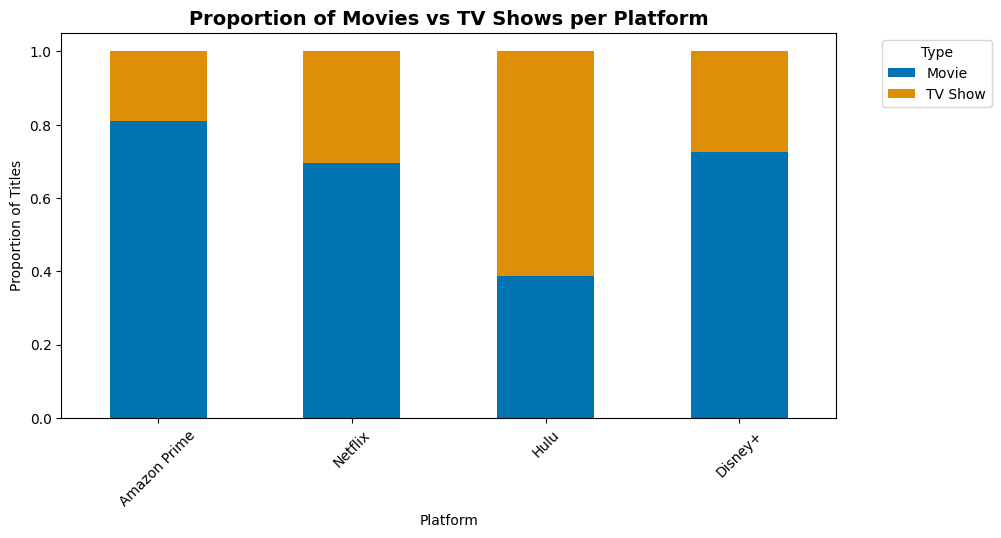

In [30]:
platform_type_counts = (
    df_all.groupby(['platform', 'type'])
    .size()
    .reset_index(name='count'))

platform_totals = platform_type_counts.groupby('platform')['count'].transform('sum')
platform_type_counts['proportion'] = platform_type_counts['count'] / platform_totals

proportion_df = platform_type_counts.pivot(index='platform', columns='type', values='proportion').fillna(0)

proportion_df = proportion_df.loc[platform_order]

proportion_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    color=sns.color_palette("colorblind"))

plt.xticks(rotation=45)
plt.title("Proportion of Movies vs TV Shows per Platform", fontsize=14, weight='bold')
plt.xlabel("Platform")
plt.ylabel("Proportion of Titles")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [31]:
df_trend = (
    df_all[df_all['release_year'].between(1990, 2025)]
    .groupby(['release_year', 'type'])
    .size()
    .reset_index(name='count'))

fig = px.line(
    df_trend,
    x='release_year',
    y='count',
    color='type',
    markers=True,
    labels={'count': 'Number of Titles', 'release_year': 'Year', 'type': 'Content Type'},
    title='Trend of Movies vs TV Shows Released Over Time',
    color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(
    font=dict(size=13),
    hovermode='x unified',
    height=500,
    margin=dict(t=70, b=50))

fig.show()

In [32]:
df_race = (
    df_all[df_all['release_year'].between(1990, 2025)]
    .groupby(['release_year', 'platform'])
    .size()
    .reset_index(name='count'))

fig = px.bar(
    df_race,
    x='platform',
    y='count',
    color='platform',
    animation_frame='release_year',
    animation_group='platform',
    range_y=[0, df_race['count'].max() + 100],
    title='Bar Chart: Content Added by Platform Over Time',
    labels={'count': 'Titles Released', 'platform': 'Platform'},
    color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    showlegend=False,
    font=dict(size=12))

fig.show()

In [33]:
df_movies = df_all[
    (df_all['release_year'].between(1990, 2025)) &
    (df_all['type'] == 'Movie')
].groupby(['release_year', 'platform']).size().reset_index(name='count')

df_shows = df_all[
    (df_all['release_year'].between(1990, 2025)) &
    (df_all['type'] == 'TV Show')
].groupby(['release_year', 'platform']).size().reset_index(name='count')


In [34]:
fig_movies = px.bar(
    df_movies,
    x='platform',
    y='count',
    color='platform',
    animation_frame='release_year',
    animation_group='platform',
    range_y=[0, df_movies['count'].max() + 100],
    title='Bar Chart: Movies Added by Platform Over Time',
    labels={'count': 'Number of Movies', 'platform': 'Platform'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig_movies.update_layout(
    xaxis={'categoryorder': 'total descending'},
    showlegend=False,
    font=dict(size=12)
)
fig_movies.show()


In [35]:
fig_shows = px.bar(
    df_shows,
    x='platform',
    y='count',
    color='platform',
    animation_frame='release_year',
    animation_group='platform',
    range_y=[0, df_shows['count'].max() + 100],
    title='Bar Chart: TV Shows Added by Platform Over Time',
    labels={'count': 'Number of TV Shows', 'platform': 'Platform'},
    color_discrete_sequence=px.colors.qualitative.Safe)

fig_shows.update_layout(
    xaxis={'categoryorder': 'total descending'},
    showlegend=False,
    font=dict(size=12))

fig_shows.show()